## Feature Selection
- **Why Feature Selection is needed?**
    - **Curse Of Dimensionality**:
        - If we have lot of feature in our dataset after a particular
            threshold if we increase number of feature we are hammpering our model growth so, Accuracy will decrease.
        - We drop some irrelavent fetures from data frame 
           
        - To deal with "Curse of dimensionality" we have to do dimensionality(no. independent features or variables) reduction.
            - Dimentionality reduction has two part 1. feature selection (picking Top50 or 70.. features) and 2. feature extraction-> when can have features that are combined 

**Types of feature selection**
- 1. Filter method, 2. Wrapper method 3. Embedded method


#### Filter Method
    - It checks relevance of each feature with the target/Output variable. 
    - All Feature -> Select Best Subset -> ML algo
        - How to select best subset? -> Using "CHI(KAI) squared test" or "ANNOVA test" and "CORRELATION COEFFICEINT" to check relevance of any variable with the output variable.
        - example:- feature name(correlation value with output/target var)
            - a(0.7), b(0.1), c(0.5)
                - Out of these features only a & c are relevance
**Wrapper Method**
    - 1. Forward Selection 2. Backward elemination
        - Forward Selection:-
            - Select a feature and train model then compute the accuracy
            - now take another feature and compute accuracy this time with previous and this feauture as well then compare the accuracy of the both, then select the higher feature
            similarly do with another feature and combine with previous one.
        - Backward Elemination :-
            - Select variable with less impact by using statical test like CHi test or ANNOVA or Correlation/Pearson Coefficent which gives a value(p-value) of all the feature, If p-value <=0.05 then that feature will be useful and p-value > 0.05 will not be useful.

**Embedded Methods**
    - If have features like A, B, C, D, E, O|P
        - Take Feature lets say B then build model and check accuracy
        - Its like testing accuracy on all of the permuatations of the features
        - Generally, We dont use Embedded Method, used in Decision Tree.

In [68]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [69]:
df = pd.read_csv('./Mobile Classification/train.csv')

### Univariate Selection

In [70]:
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [71]:
X = df.iloc[:, 0:20]
y = df.iloc[:, -1]

In [72]:
X.shape, y.shape

((2000, 20), (2000,))

In [73]:
# Apply selectKBest , top 10 features

In [74]:
best_features = SelectKBest(score_func=chi2, k = 10) # k = 10 mean top 10

In [75]:
fit = best_features.fit(X,y)

In [76]:
fit

SelectKBest(score_func=<function chi2 at 0x000001B264F431F0>)

In [77]:
fit.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [78]:
dfscores = pd.DataFrame(fit.scores_)

In [79]:
dfcolumns = pd.DataFrame(X.columns)

In [80]:
# dfcolumns

In [81]:
feature_scores = pd.concat([dfcolumns, dfscores],axis = 1)

In [82]:
feature_scores.columns = ['Features','Scores']

In [136]:
ten_features = feature_scores.sort_values(by = 'Scores', ascending =  False).head(10)['Features'].values

In [137]:
feature_scores.sort_values(by = 'Scores', ascending = False)

,Features,Scores
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


## Feature Importance

- It another technique for feature selection

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
model = RandomForestClassifier()

In [140]:
model.fit(X,y)

RandomForestClassifier()

In [141]:
model.feature_importances_

array([0.07367743, 0.006202  , 0.02666638, 0.00637538, 0.02386062,
       0.00638068, 0.03434875, 0.02458003, 0.03872135, 0.02173527,
       0.02838414, 0.05622532, 0.05676458, 0.49270915, 0.02722059,
       0.02795012, 0.02970536, 0.00559726, 0.00693986, 0.00595573])

In [142]:
feature_important = pd.DataFrame(model.feature_importances_, index = X.columns, columns = ['Importance']  )

In [143]:
feature_important.sort_values(by='Importance', ascending = False)

,Importance
ram,0.492709
battery_power,0.073677
px_width,0.056765
px_height,0.056225
mobile_wt,0.038721
int_memory,0.034349
talk_time,0.029705
pc,0.028384
sc_w,0.027950
sc_h,0.027221


<BarContainer object of 20 artists>

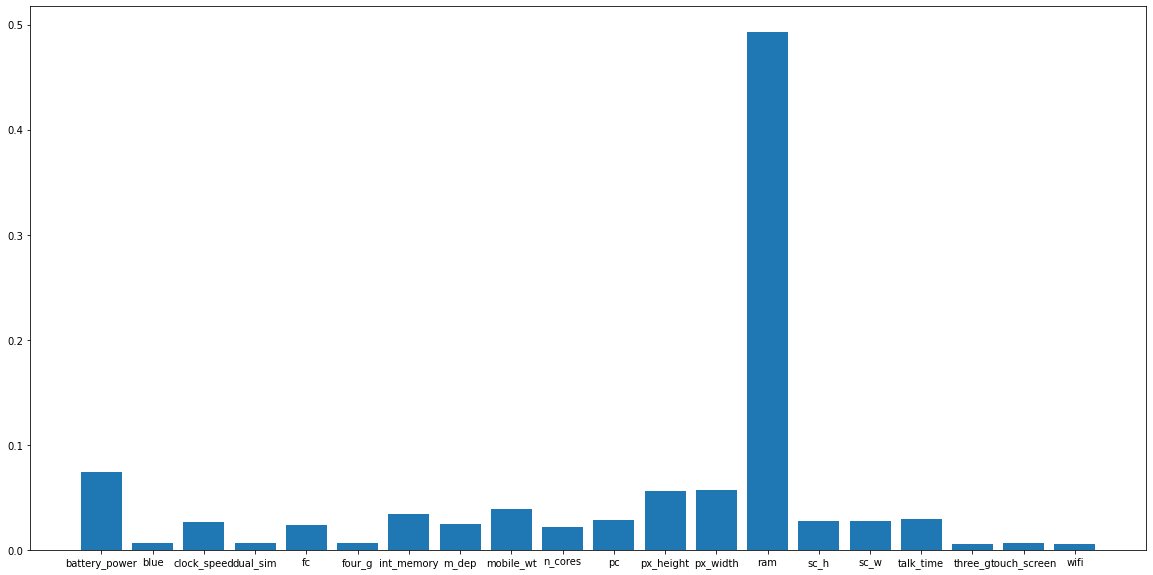

In [144]:
plt.figure(figsize=(20,10))
plt.bar(feature_important.index, height = feature_important['Importance'])

## Correlation Methode

In [145]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [146]:
import seaborn as sns

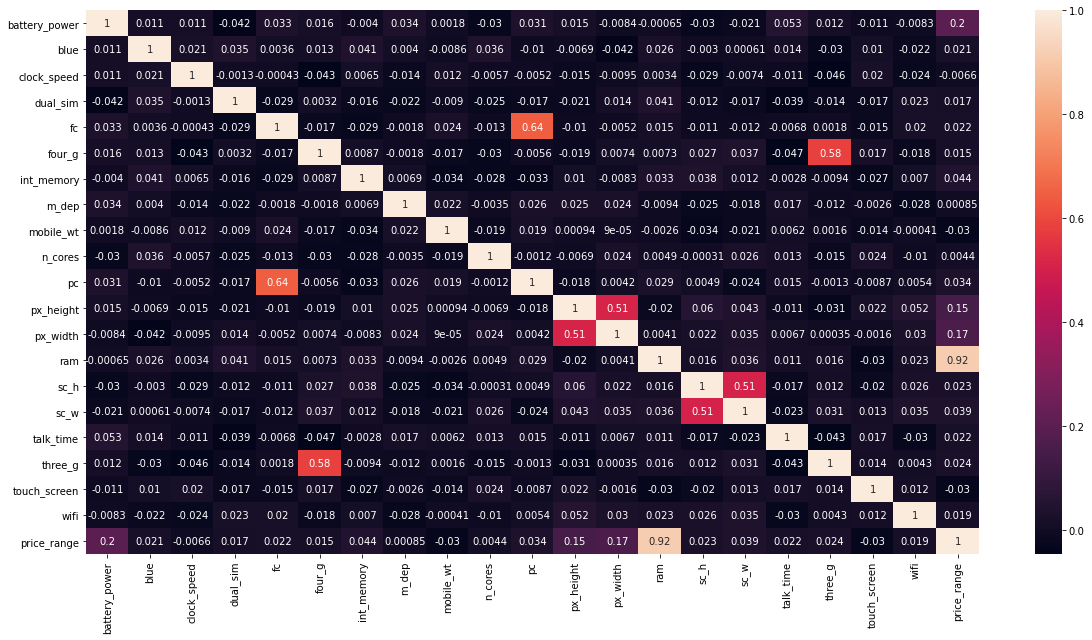

In [147]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

## Check the model Preformance

In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [149]:
rfc = RandomForestClassifier()

In [150]:
scores = cross_val_score(rfc, X, y, cv = 10)
scores

array([0.88 , 0.85 , 0.915, 0.875, 0.905, 0.92 , 0.85 , 0.88 , 0.835,
       0.855])

In [151]:
scores.mean()

0.8765000000000001

In [152]:
X[ten_features]

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_w,talk_time,fc,sc_h
0,2549,20,842,756,188,7,7,19,1,9
1,2631,905,1021,1988,136,53,3,7,0,17
2,2603,1263,563,1716,145,41,2,9,2,11
3,2769,1216,615,1786,131,10,8,11,0,16
4,1411,1208,1821,1212,141,44,2,15,13,8
...,...,...,...,...,...,...,...,...,...,...
1995,668,1222,794,1890,106,2,4,19,0,13
1996,2032,915,1965,1965,187,39,10,16,0,11
1997,3057,868,1911,1632,108,36,1,5,1,9
1998,869,336,1512,670,145,46,10,19,4,18


In [158]:
scores_new = cross_val_score(rfc, X[ten_features], y, cv = 10)

In [159]:
scores_new

array([0.9  , 0.895, 0.925, 0.9  , 0.925, 0.91 , 0.9  , 0.885, 0.875,
       0.895])